In [1]:
from IPython.core.display import HTML
with open('../style.css') as file:
    css = file.read()
HTML(css)

# The Fibonacci Numbers

The [Fibonacci numbers](https://en.wikipedia.org/wiki/Fibonacci_number) $F_n$ are defined by induction for all $n\in\mathbb{N}$:
  - $F_0 := 0$,
  - $F_1 := 1$, 
  - $F_{n+2} = F_{n+1} + F_n$ for all $n \in \mathbb{N}$.

Given a natural number `n`, the function `fibonacci(n)` computes the number $F_n$.

In [2]:
def fibonacci(n):
    if n <= 1:
        return n
    return fibonacci(n-1) + fibonacci(n-2)

In [3]:
[ (n,fibonacci(n)) for n in range(19) ]

[(0, 0),
 (1, 1),
 (2, 1),
 (3, 2),
 (4, 3),
 (5, 5),
 (6, 8),
 (7, 13),
 (8, 21),
 (9, 34),
 (10, 55),
 (11, 89),
 (12, 144),
 (13, 233),
 (14, 377),
 (15, 610),
 (16, 987),
 (17, 1597),
 (18, 2584)]

It seems that the *Fibonacci numbers* grow pretty fast. Let us plot these numbers to get a better understanding of their growth.

In [4]:
import matplotlib.pyplot as plt
import seaborn           as sns

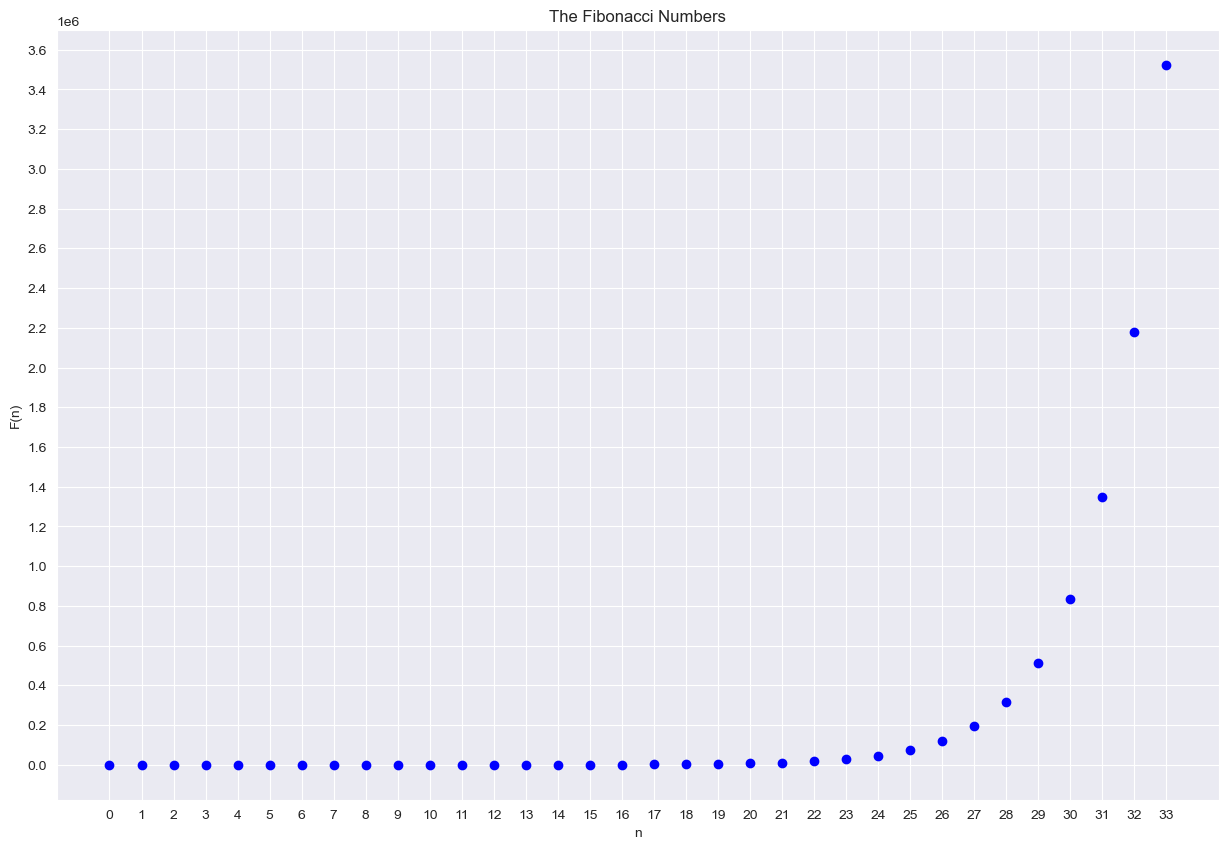

In [5]:
m = 34
X = []
Y = []
for n in range(m):
    X.append(n)
    Y.append(fibonacci(n))
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
plt.plot(X, Y, 'bo')
plt.xticks(X)
plt.yticks([y * 2e5 for y in range(19)])
plt.xlabel('n')
plt.ylabel('F(n)')
plt.title('The Fibonacci Numbers')
plt.show()

It looks like the *Fibonacci numbers* grow exponentially.  Let us confirm this hypothesis by plotting the logarithm of these numbers.

In [6]:
import math

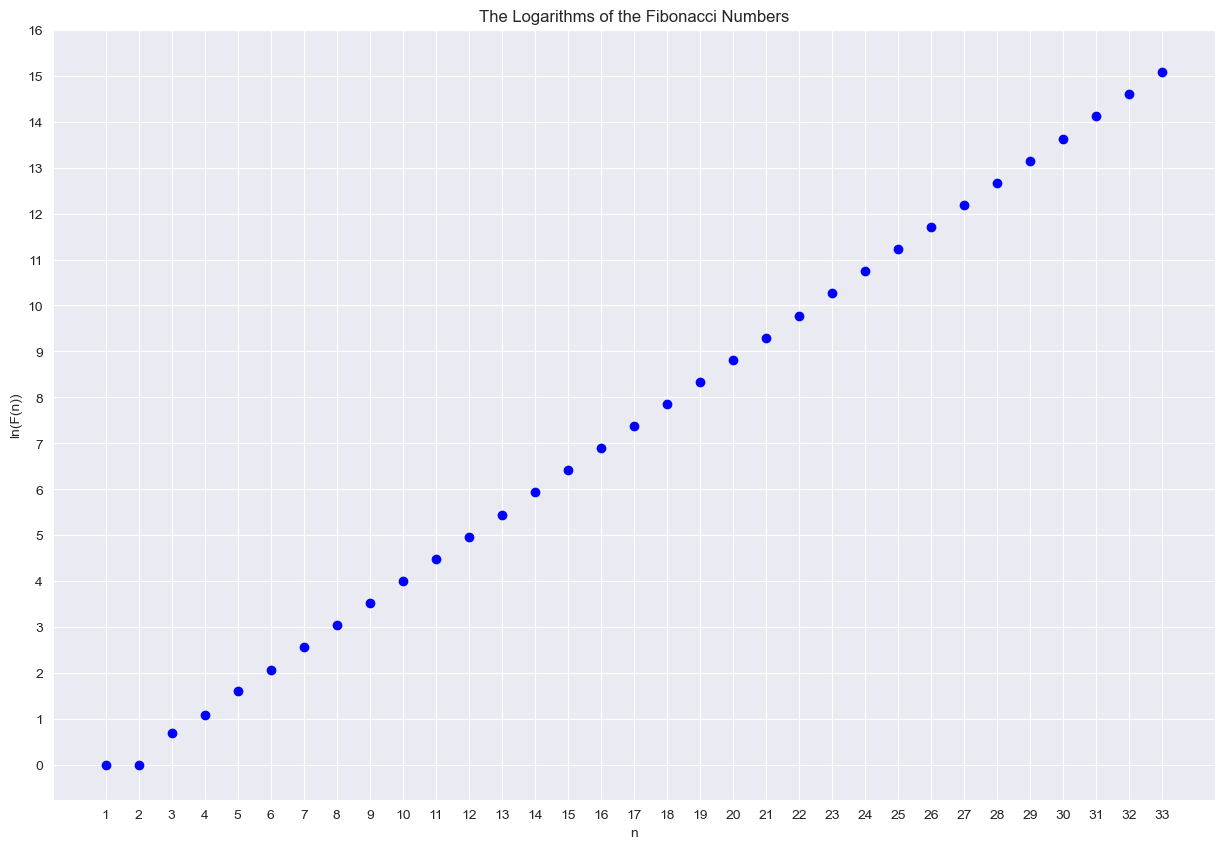

In [7]:
X = X[1:]
Y = Y[1:]
logY = [math.log(y) for y in Y]
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
plt.plot(X, logY, 'bo') 
plt.xticks(X)
plt.yticks(list(range(17)))
plt.xlabel('n')
plt.ylabel('ln(F(n))')
plt.title('The Logarithms of the Fibonacci Numbers')
plt.show()

This plot looks linear and confirms our hypothesis that these numbers grow exponentially.

Computing the *Fibonacci numbers* took quite long.  Lets measure these times and plot them.

In [9]:
x = 1
y = 2
f'{x} + {y} = {x + y}'

'1 + 2 = 3'

In [8]:
import time

fib(0) = 0
0.00020194053649902344
fib(1) = 1
6.198883056640625e-06
fib(2) = 1
5.0067901611328125e-06
fib(3) = 2
5.245208740234375e-06
fib(4) = 3
5.245208740234375e-06
fib(5) = 5
5.9604644775390625e-06
fib(6) = 8
6.9141387939453125e-06
fib(7) = 13
8.344650268554688e-06
fib(8) = 21
1.1920928955078125e-05
fib(9) = 34
1.6689300537109375e-05
fib(10) = 55
3.0994415283203125e-05
fib(11) = 89
3.719329833984375e-05
fib(12) = 144
5.793571472167969e-05
fib(13) = 233
9.083747863769531e-05
fib(14) = 377
0.00014472007751464844
fib(15) = 610
0.0002880096435546875
fib(16) = 987
0.0003788471221923828
fib(17) = 1597
0.0006022453308105469
fib(18) = 2584
0.0009739398956298828
fib(19) = 4181
0.0015988349914550781
fib(20) = 6765
0.002863168716430664
fib(21) = 10946
0.005064964294433594
fib(22) = 17711
0.006973743438720703
fib(23) = 28657
0.011094808578491211
fib(24) = 46368
0.016618013381958008
fib(25) = 75025
0.025189876556396484
fib(26) = 121393
0.035704851150512695
fib(27) = 196418
0.0540468692779541
fib

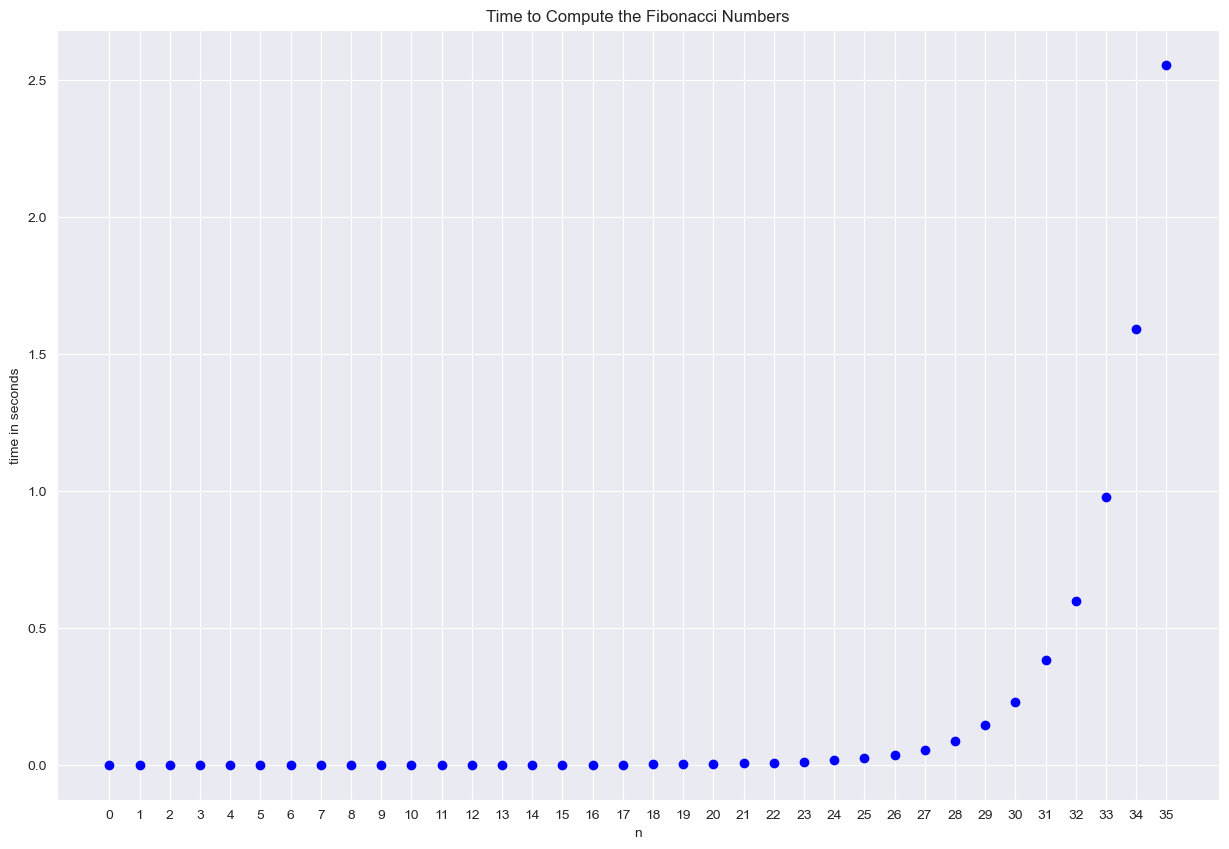

In [10]:
m = 36
Y = []
X = list(range(m))
for n in range(m):
    start = time.time()
    print(f'fib({n}) = {fibonacci(n)}')
    stop  = time.time()
    print(stop - start)
    Y.append(stop - start)
    
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
plt.plot(X, Y, 'bo') 
plt.xticks(X)
plt.xlabel('n')
plt.ylabel('time in seconds')
plt.title('Time to Compute the Fibonacci Numbers')
plt.show()

The times seem to grow exponentially.  

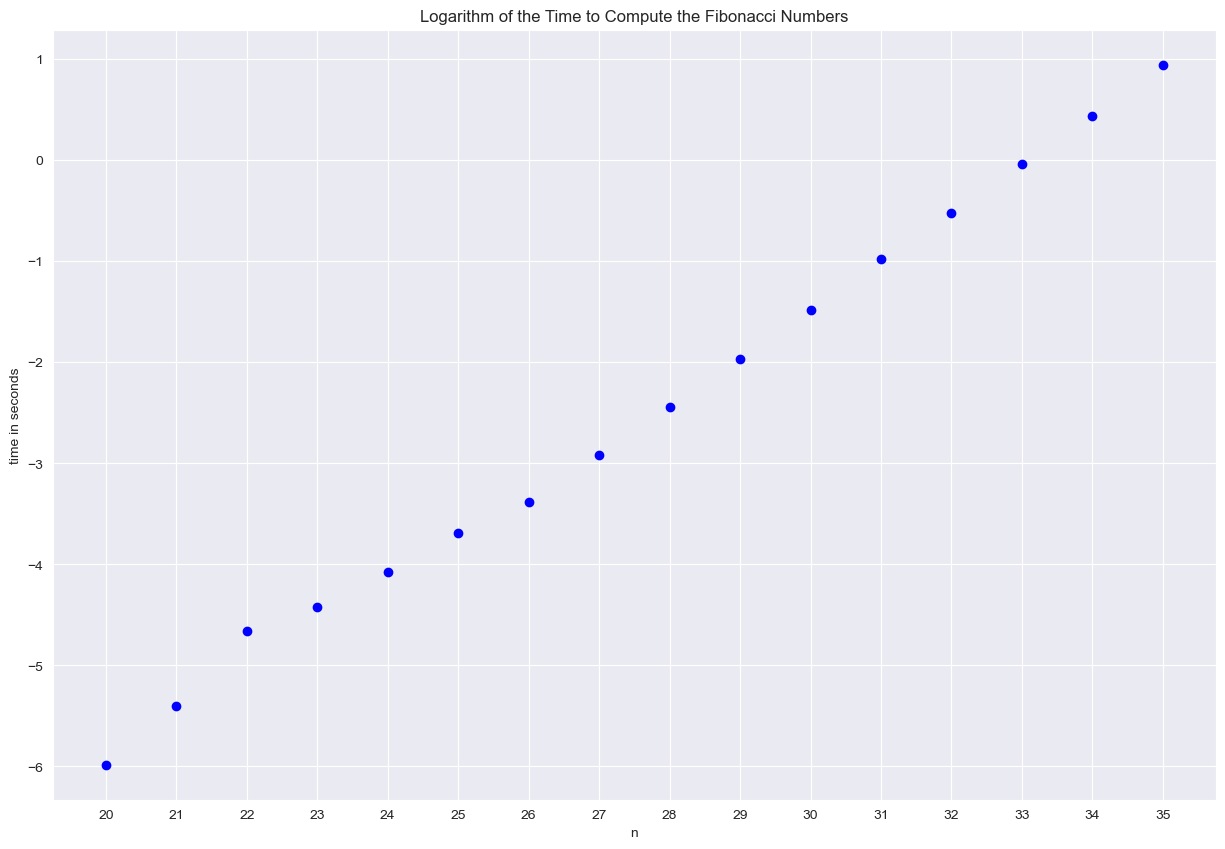

In [11]:
m = 36
Y = []
X = list(range(20, m))
for n in X:
    start = time.time()
    fibonacci(n)
    stop  = time.time()
    Y.append(math.log(stop - start))
    
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
plt.plot(X, Y, 'bo') 
plt.xticks(X)
plt.xlabel('n')
plt.ylabel('time in seconds')
plt.title('Logarithm of the Time to Compute the Fibonacci Numbers')
plt.show()

The logarithmic plot confirms this.  In order to investigate the reason for this exponential growth, we compute the *computation tree*.  This tree shows the recursive invocations of the function.

In [12]:
import graphviz as gv

In [13]:
class ComputationTree:
    def __init__(self, arg, value, left=None, right=None):
        self.mArg   = arg
        self.mValue = value
        self.mLeft  = left
        self.mRight = right

In [14]:
def isLeaf(self):
    return self.mLeft == None and self.mRight == None

ComputationTree.isLeaf = isLeaf
del isLeaf

In [15]:
def toDot(self):
    ComputationTree.sCounter = 0 # static variable of the class ComputationTree
    dot = gv.Digraph(node_attr={'shape': 'record', 'style': 'rounded'})
    NodeDict = {}
    self._assignIDs(NodeDict)
    for n, t in NodeDict.items():
        dot.node(str(n), label='{' + str(t.mArg) + '|' + str(t.mValue) + '}')
        if t.mLeft != None and t.mRight != None:
            dot.edge(str(n), str(t.mLeft .mID))
            dot.edge(str(n), str(t.mRight.mID))
    return dot

ComputationTree.toDot = toDot
del toDot

In [16]:
def _assignIDs(self, NodeDict):
    ComputationTree.sCounter += 1
    self.mID = ComputationTree.sCounter
    NodeDict[self.mID] = self
    if self.isLeaf():
        return
    self.mLeft ._assignIDs(NodeDict)
    self.mRight._assignIDs(NodeDict)
    
ComputationTree._assignIDs = _assignIDs
del _assignIDs

In [17]:
def fibonacci_tree(n):
    if n <= 1:
        return ComputationTree(n, n)
    C1 = fibonacci_tree(n-1)
    C2 = fibonacci_tree(n-2)
    return ComputationTree(n, C1.mValue + C2.mValue, C1, C2)

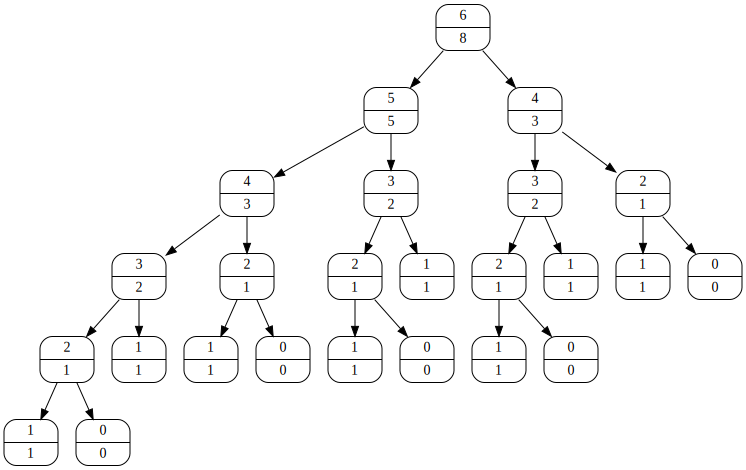

In [18]:
t = fibonacci_tree(6)
t.toDot()

The *computation tree* for the computation of `fibonacci(6)` shows the reason for the inefficiency:
* `fibonacci(5)` is computed once,
* `fibonacci(4)` is computed 2 times,
* `fibonacci(3)` is computed 3 times,
* `fibonacci(2)` is computed 5 times,
* `fibonacci(1)` is computed 8 times, and
* `fibonacci(0)` is computed 5 times.

If we want to compute the Fibonacci numbers efficiently, we must not compute the value `fibonacci(n)` for a given `n` more than once.  The easiest way to achieve this is by storing the Fibnacci numbers in a list `L`.  In the implementation below, `L[n]` stores the $n$-th Fibonacci number.

In [19]:
def fibonacci_mem(n):
    if n <= 1:
        return n
    L    = [0 for k in range(n+1)]
    L[0] = 0
    L[1] = 1
    for k in range(2, n+1):
        L[k] = L[k-1] + L[k-2]
    return L[n]

Now it is even possible to compute the $100,000^\mbox{th}$ *Fibonnaci number*.

In [20]:
%%time
x = fibonacci_mem(100_000)

CPU times: user 270 ms, sys: 149 ms, total: 419 ms
Wall time: 418 ms


In [21]:
x

2597406934722172416615503402127591541488048538651769658472477070395253454351127368626555677283671674475463758722307443211163839947387509103096569738218830449305228763853133492135302679278956701051276578271635608073050532200243233114383986516137827238124777453778337299916214634050054669860390862750996639366409211890125271960172105060300350586894028558103675117658251368377438684936413457338834365158775425371912410500332195991330062204363035213756525421823998690848556374080179251761629391754963458558616300762819916081109836526352995440694284206571046044903805647136346033000520852277707554446794723709030979019014860432846819857961015951001850608264919234587313399150133919932363102301864172536477136266475080133982431231703431452964181790051187957316766834979901682011849907756686456845066287392485603914047605199550066288826345877189410680370091879365001733011710028310473947456256091444932821374855573864080579813028266640270354294412104919995803131876805899186513425175959911520563155337703996